In [ ]:
import os
os.chdir('..')

In [27]:
import pandas as pd
import yaml
import pycountry
import shapely.geometry
import geopandas as gpd
import matplotlib.pyplot as plt

from src.construct import util


In [3]:
with open('config/default.yaml', 'r') as f:
    config = yaml.safe_load(f)

In [5]:
countries = [util.get_alpha3(i) for i in config['scope']['countries']]

In [7]:
df = pd.read_csv('/Users/brynmorp/Data/globalpowerplantdatabasev120/global_power_plant_database.csv')

In [103]:
nuclear_europe = jrc_ppdb[jrc_ppdb.type_g == 'Nuclear']  #df[(df.primary_fuel == 'Nuclear') & (df.country.isin(countries))]

In [104]:
nuclear_europe_points = [shapely.geometry.Point(xy) for xy in zip(nuclear_europe.lon, nuclear_europe.lat)]

In [105]:
nuclear_europe_gdf = gpd.GeoDataFrame(nuclear_europe, geometry=nuclear_europe_points, crs='epsg:4326')

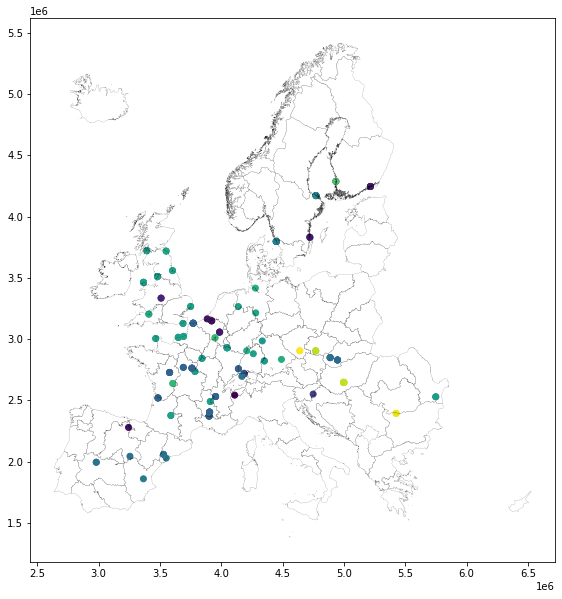

In [106]:
units = gpd.read_file('build/units.geojson')
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
nuclear_europe_gdf.to_crs('epsg:3035').plot('capacity_p', ax=ax)
units.to_crs('epsg:3035').plot(ax=ax, fc='None', ec='black', lw=0.1)

In [115]:
nuclear_in_eurospores = gpd.overlay(nuclear_europe_gdf, units).groupby(['id', 'country_code']).sum()['capacity_g']
nuclear_proportion = nuclear_in_eurospores.div(nuclear_in_eurospores.sum(level='country_code'))

In [116]:
nuclear_proportion

id      country_code
BEL_1   BEL             1.000000
BGR_1   BGR             1.000000
CHE_1   CHE             0.887934
CHE_2   CHE             0.112066
CZE_1   CZE             0.522358
CZE_2   CZE             0.477642
DEU_1   DEU             0.339760
DEU_6   DEU             0.225238
DEU_7   DEU             0.435002
ESP_11  ESP             0.140497
ESP_3   ESP             0.192621
ESP_6   ESP             0.400507
ESP_8   ESP             0.266375
FIN_2   FIN             1.000000
FRA_1   FRA             0.099160
FRA_11  FRA             0.041502
FRA_12  FRA             0.110249
FRA_13  FRA             0.212894
FRA_14  FRA             0.047521
FRA_4   FRA             0.104705
FRA_5   FRA             0.126881
FRA_6   FRA             0.115951
FRA_7   FRA             0.099002
FRA_9   FRA             0.042135
GBR_1   GBR             0.208894
GBR_2   GBR             0.110777
GBR_3   GBR             0.362083
GBR_4   GBR             0.318247
HUN_1   HUN             1.000000
NLD_1   NLD           

In [80]:
capacity_2050 = pd.read_csv('euro-calliope/data/nuclear_capacity_2050.csv', index_col=0)

In [81]:
capacity_2050[['installed_capacity_min_MW', 'installed_capacity_max_MW']].mul(nuclear_proportion, level='country_code', axis=0).dropna()

,,installed_capacity_min_MW,installed_capacity_max_MW
id,country_code,,
BGR_1,BGR,0.000000,3200.000000
CZE_1,CZE,3184.421280,4017.584472
CZE_2,CZE,3045.578720,3842.415528
FIN_2,FIN,0.000000,2750.000000
FRA_1,FRA,2181.530176,5810.803105
FRA_11,FRA,913.036591,2431.997466
FRA_12,FRA,2425.471250,6460.573420
FRA_13,FRA,4683.668620,12475.590052
FRA_14,FRA,1045.461746,2784.729922


In [97]:
df[(df.primary_fuel == 'Nuclear') & (df.country.isin(countries))].capacity_mw.sum()

124507.66

In [99]:
jrc_ppdb = pd.read_csv('/Users/brynmorp/Downloads/JRC-PPDB-OPEN.ver1.0/JRC_OPEN_UNITS.csv')

In [113]:
nuclear_europe_gdf.year_decommissioned.dropna()

439     2017.0
454     2015.0
645     2012.0
2404    2011.0
2405    2011.0
2486    2015.0
2487    2015.0
2488    2015.0
2489    2015.0
5375    2015.0
5389    2017.0
Name: year_decommissioned, dtype: float64